In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# downgrading to networkx to avoid any conflict with scipy version 
!pip uninstall networkx -y
!pip install networkx==2.4
import networkx as nx 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Found existing installation: networkx 2.4
Uninstalling networkx-2.4:
  Successfully uninstalled networkx-2.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)


In [187]:
##############################
# since the 2020 file has data from 2016 to 2020, we are reading the files starting from 2020 till 2022
##############################

ti=[]
for i in range(2020,2023):
  path = str(i) + ".csv"
  fd = pd.read_csv(path)

  ti.append(fd)

  frame = pd.concat(ti, axis=0, ignore_index=True)

In [188]:
df=frame.copy() # create a copy of dataframe to work on

In [189]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) # remove emojis
df['tweet'] = df['tweet'].str.replace('(\@\w+.*?)',"") # remove all the mentions of accounts
df["tweet"] = df["tweet"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip() # remove links starting with https
df["tweet"] = df["tweet"].str.replace(r'\s*http?://\S+(\s+|$)', ' ').str.strip()  # remove links starting with http
df['tweet'] = df['tweet'].str.replace('(\#\w+.*?)',"") # remove all hashtag mentions
df['tweet'] = df['tweet'].str.replace(r'[^\w\s]+', '') # remove all the remaining special characters
df['tweet'] = df['tweet'].str.replace('amp','') # remove amp word for &
df['tweet'] = df['tweet'].str.strip() # remove any empty spaces

<ipython-input-189-1f860e123ee7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('(\@\w+.*?)',"")
<ipython-input-189-1f860e123ee7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["tweet"] = df["tweet"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
<ipython-input-189-1f860e123ee7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["tweet"] = df["tweet"].str.replace(r'\s*http?://\S+(\s+|$)', ' ').str.strip()
<ipython-input-189-1f860e123ee7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('(\#\w+.*?)',"")
<ipython-input-189-1f860e123ee7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r'[^\w\s]+', '')


In [191]:
# since the file 2020 has objects from 2016, we are filtering the data as per the question
df['year'] = pd.DatetimeIndex(df['date']).year
df = df.loc[df['year'] > 2016]

In [192]:
# remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))

In [193]:
# removing any empty lines based on the tweet column
df['tweet'] = df['tweet'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['tweet'], inplace=True)

In [194]:
df1=df[['year','tweet']]
df1.tweet=df1.tweet.map(nltk.word_tokenize).tolist() # tokenize tweets
df1

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,year,tweet
0,2020,"[entertainment, critical, cars, drive]"
1,2020,"[meeting, larry, ellison, seek, advice, back, ..."
2,2020,[absolutely]
3,2020,"[tesla, incar, gaming, autonomous, world]"
4,2020,[absolutely]
...,...,...
15852,2022,"[reminds, hex, edited, ultima, v, get, final, ..."
15853,2022,"[yay, switzerland]"
15854,2022,"[way, touch, voters, youre, three, generations..."
15856,2022,"[lets, make, roaring, 20s, happen]"


In [195]:
df2 = df1.explode('tweet') # separating all the tweets to rows
df2

,year,tweet
0,2020,entertainment
0,2020,critical
0,2020,cars
0,2020,drive
1,2020,meeting
...,...,...
15857,2022,great
15857,2022,work
15857,2022,tesla
15857,2022,team


In [196]:
# calculating top 10 words for each year

df2['num'] = 1
df3 = df2.groupby(['year','tweet'],as_index=False)['num'].sum()

fi=[]
for i in range(2017,2023):
  
  dtf = df3.loc[df3['year'] == i]
  dtf = dtf.sort_values(by=['num'],ascending = False)
  dtf = dtf.head(10)
  fi.append(dtf)

  top10 = pd.concat(fi, axis=0, ignore_index=True)

In [197]:
top10.sort_values(by=['year','num'],ascending=False) # print top 10 words

,year,tweet,num
50,2022,tesla,62
51,2022,people,34
52,2022,yes,32
53,2022,would,30
54,2022,one,30
55,2022,starlink,28
56,2022,good,28
57,2022,car,26
58,2022,high,22
59,2022,great,22


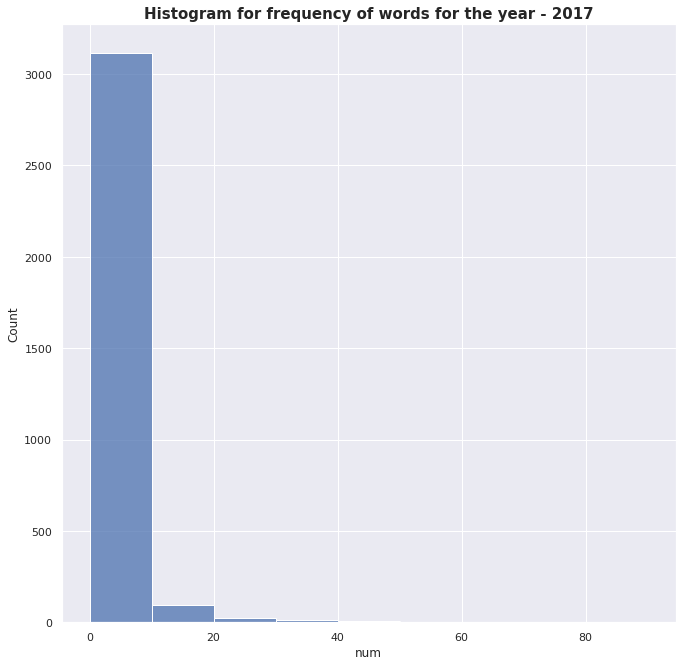

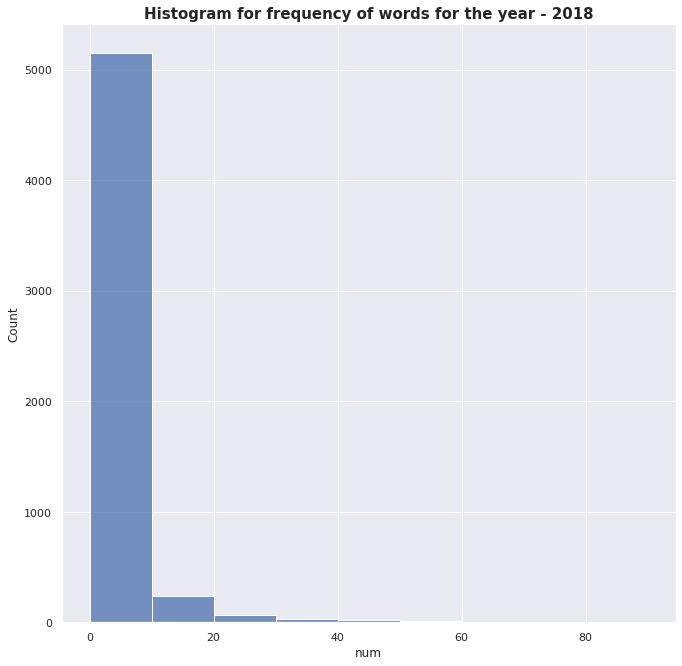

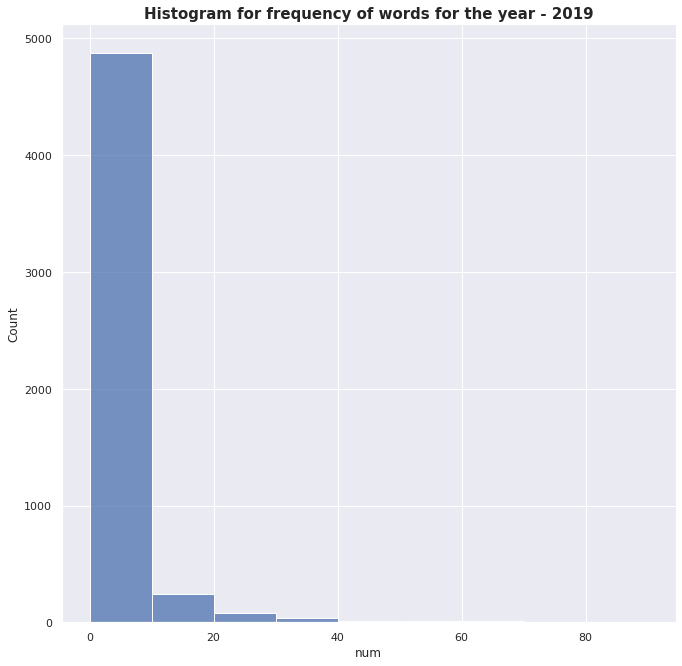

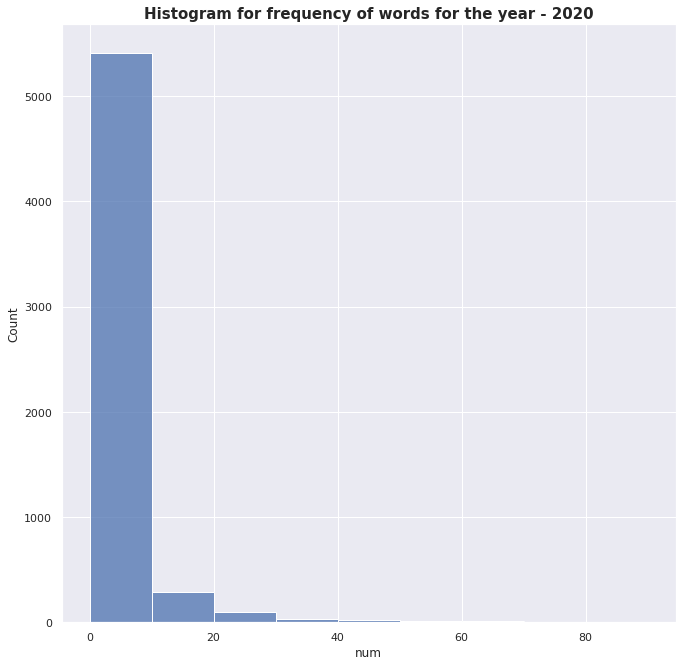

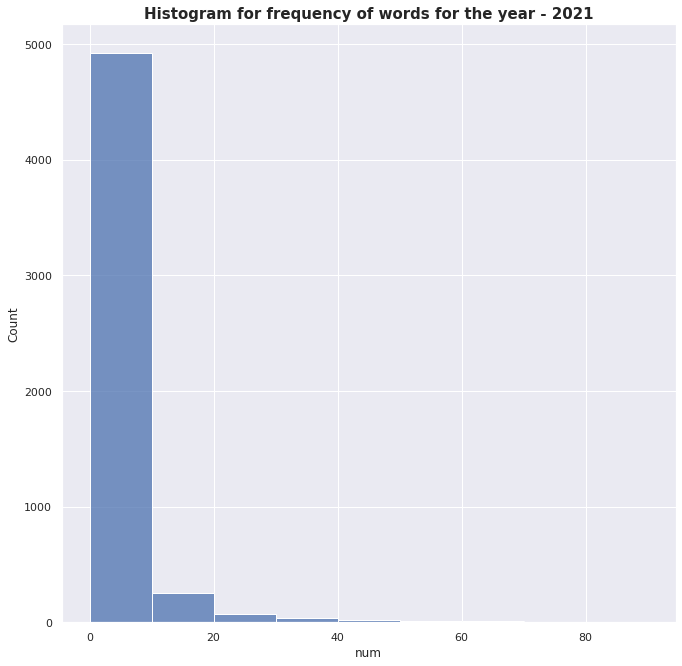

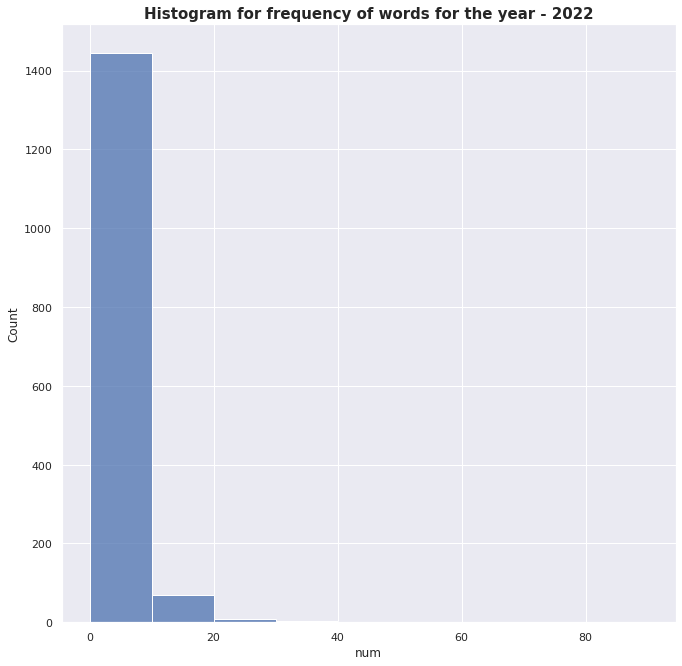

In [214]:
# plot histogram for each year

for i in range(2017,2023):
  dat = df3.loc[df3['year'] == i]
  sns.histplot(data = dat, x = "num",bins= range(0,100,10))
  plt.title("Histogram for frequency of words for the year - " + str(i),fontweight="bold", fontsize=15)
  plt.show()

In [199]:
df5 = df3.copy()

In [200]:
df5['rank'] = df5.groupby(['year'])['num'].rank(ascending=False,method='first')
df5.sort_values(by=['year','num'],ascending=False)

,year,tweet,num,rank
26628,2022,tesla,62,1.0
26273,2022,people,34,2.0
26821,2022,yes,32,3.0
26218,2022,one,30,4.0
26809,2022,would,30,5.0
...,...,...,...,...
3251,2017,youth,1,3254.0
3252,2017,yrs,1,3255.0
3254,2017,zedd,1,3256.0
3256,2017,zeroth,1,3257.0


In [201]:
# calculating total word frequency of each year
df6 = df3.groupby(['year'],as_index=False)['num'].sum()
df6 = df6.rename(columns={'num': 'total'})
df6

,year,total
0,2017,8657
1,2018,19174
2,2019,19530
3,2020,22123
4,2021,19875
5,2022,5326


In [202]:
df7 = df5.merge(df6,on=['year'],how='left') # add the total count to each word
df7['term frequency'] = df7['num'] / df7['total'] # calculate term frequency by zipf's law

df7

,year,tweet,num,rank,total,term frequency
0,2017,0,3,534.0,8657,0.000347
1,2017,008,1,1343.0,8657,0.000116
2,2017,015,1,1344.0,8657,0.000116
3,2017,040,1,1345.0,8657,0.000116
4,2017,07m,1,1346.0,8657,0.000116
...,...,...,...,...,...,...
26825,2022,youre,4,477.0,5326,0.000751
26826,2022,youtube,2,1526.0,5326,0.000376
26827,2022,yup,10,83.0,5326,0.001878
26828,2022,zealand,2,1527.0,5326,0.000376


In [203]:
# scalling to rank and term frequency to log

df8['log_tf'] = np.log(df8['term frequency'])
df8['log_rank'] = np.log(df8['rank'])

,year,tweet,num,rank,total,term frequency,log_tf,log_rank
13465,2019,tesla,251,1.0,19530,0.012852,-4.354254,0.000000
2887,2017,tesla,71,1.0,8657,0.008201,-4.803444,0.000000
26628,2022,tesla,62,1.0,5326,0.011641,-4.453221,0.000000
24698,2021,tesla,206,1.0,19875,0.010365,-4.569342,0.000000
19298,2020,tesla,188,1.0,22123,0.008498,-4.767931,0.000000
...,...,...,...,...,...,...,...,...
19954,2020,zeros,1,5882.0,22123,0.000045,-10.004373,8.679652
19955,2020,zerosumnegativesum,1,5883.0,22123,0.000045,-10.004373,8.679822
19956,2020,zilch,1,5884.0,22123,0.000045,-10.004373,8.679992
19957,2020,zillion,1,5885.0,22123,0.000045,-10.004373,8.680162


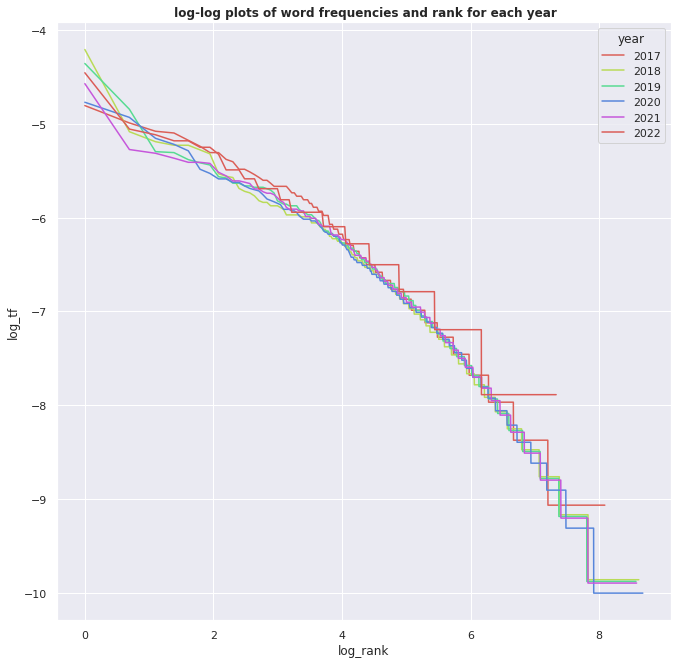

In [215]:
# plot log-log plots of word frequencies and rank for each year
sns.set(rc={'figure.figsize':(11,11)})
sns.lineplot(data = df8,x='log_rank',y="log_tf", hue = 'year',palette='hls')
plt.title(' log-log plots of word frequencies and rank for each year',fontweight="bold")
plt.show()

In [205]:
gram=df[['year','tweet']]
gram['bigrams'] = df1['tweet'].apply(lambda x: list(nltk.ngrams(x,2))) # calculating bigrams

<ipython-input-205-e6b0bbcee79a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gram['bigrams'] = df1['tweet'].apply(lambda x: list(nltk.ngrams(x,2))) # calculating bigrams


In [206]:
bic = gram[['year','bigrams']]
bic = bic.explode('bigrams') # separate the bigrams to different rows
bic.dropna(subset=['bigrams'],inplace=True) # dropping any empty rows

In [226]:
 # plotting bigram network graphs for each year
def networkgraph(thresh,year):

  bic3 = bic.loc[bic['year'] == year] # filter on  year
  bic3 = bic3[['bigrams']]

  bic3.reset_index(drop=True, inplace=True)
  bic4 = pd.DataFrame(bic3["bigrams"].to_list(), columns=['word1', 'word2']) # separating the bigrams to different columns
  bic4['num'] = 1
  bic4 = bic4.groupby(['word1','word2'],as_index=False)['num'].sum() # count pairs

  bic4.sort_values(by='num',ascending=False)
  bic4 = bic4.loc[bic4['num'] >=thresh] # consider pairs with count more than threshold
  G = nx.from_pandas_edgelist(bic4,source='word1',target='word2') # create graph from dataframe

  plt.figure(figsize=(40,30)) # set figure size
  nx.draw(G,with_labels= True) # plot the graph

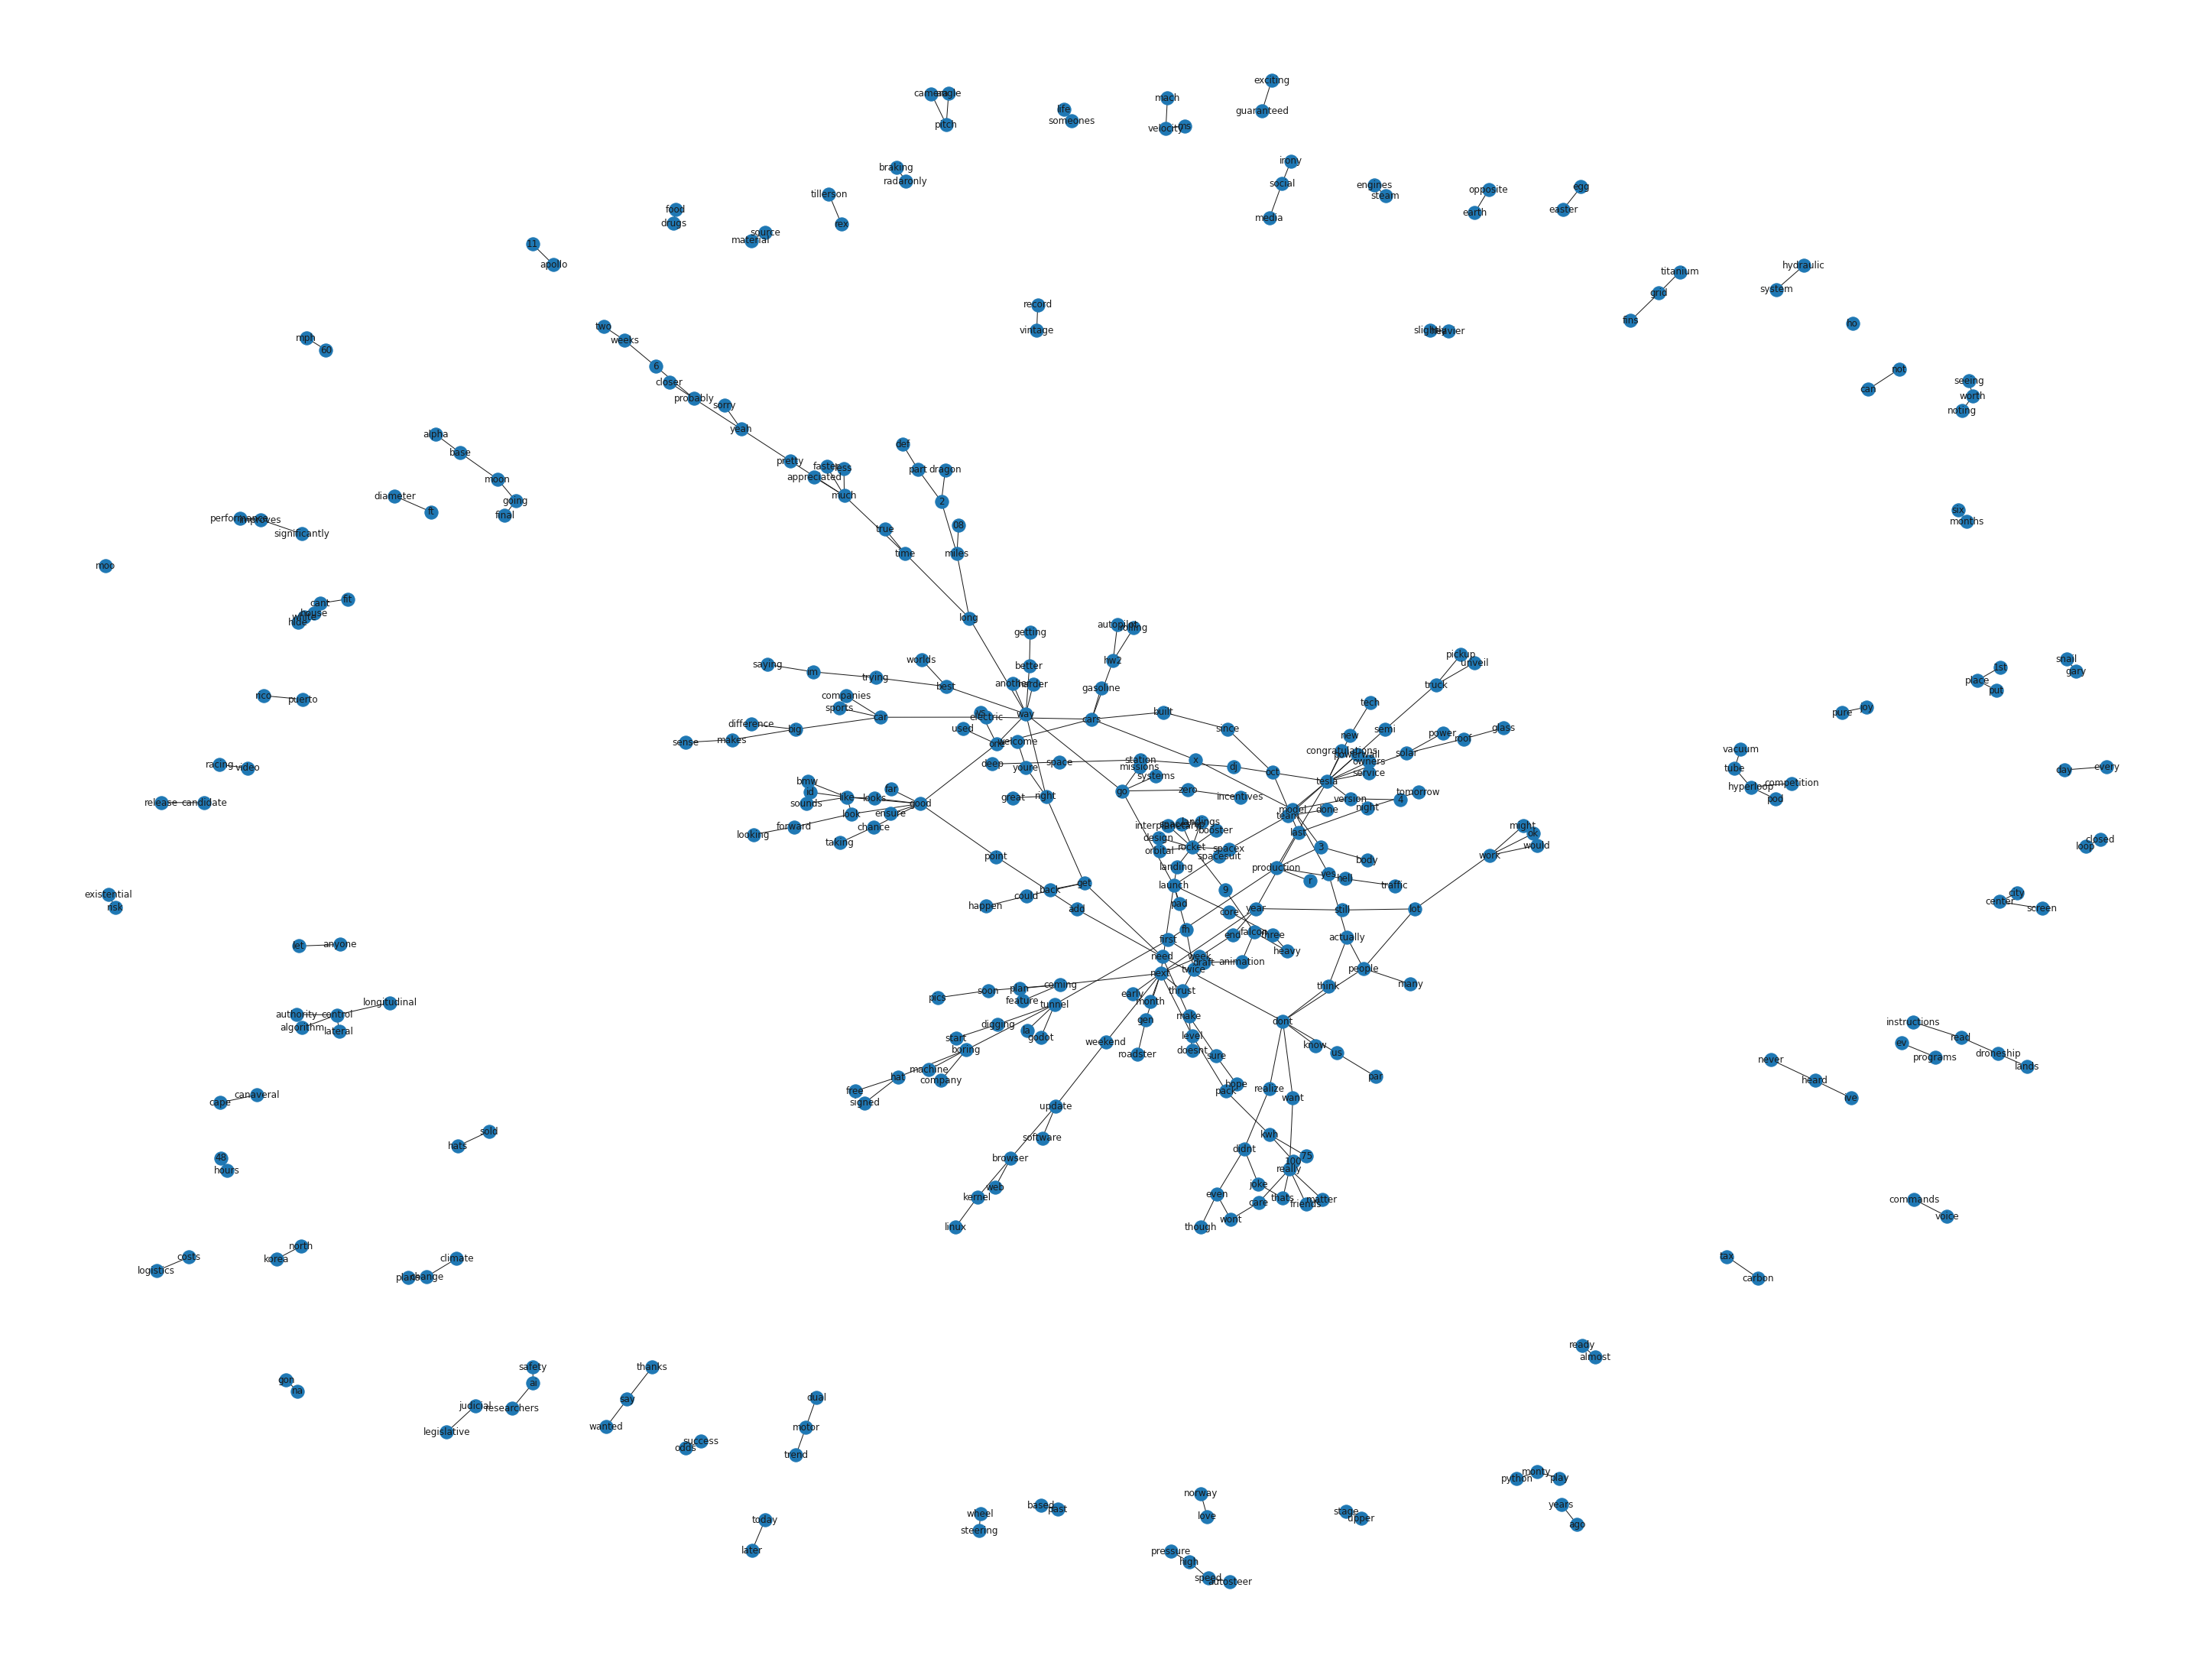

In [227]:
networkgraph(2,2017) # network graph for year 2017

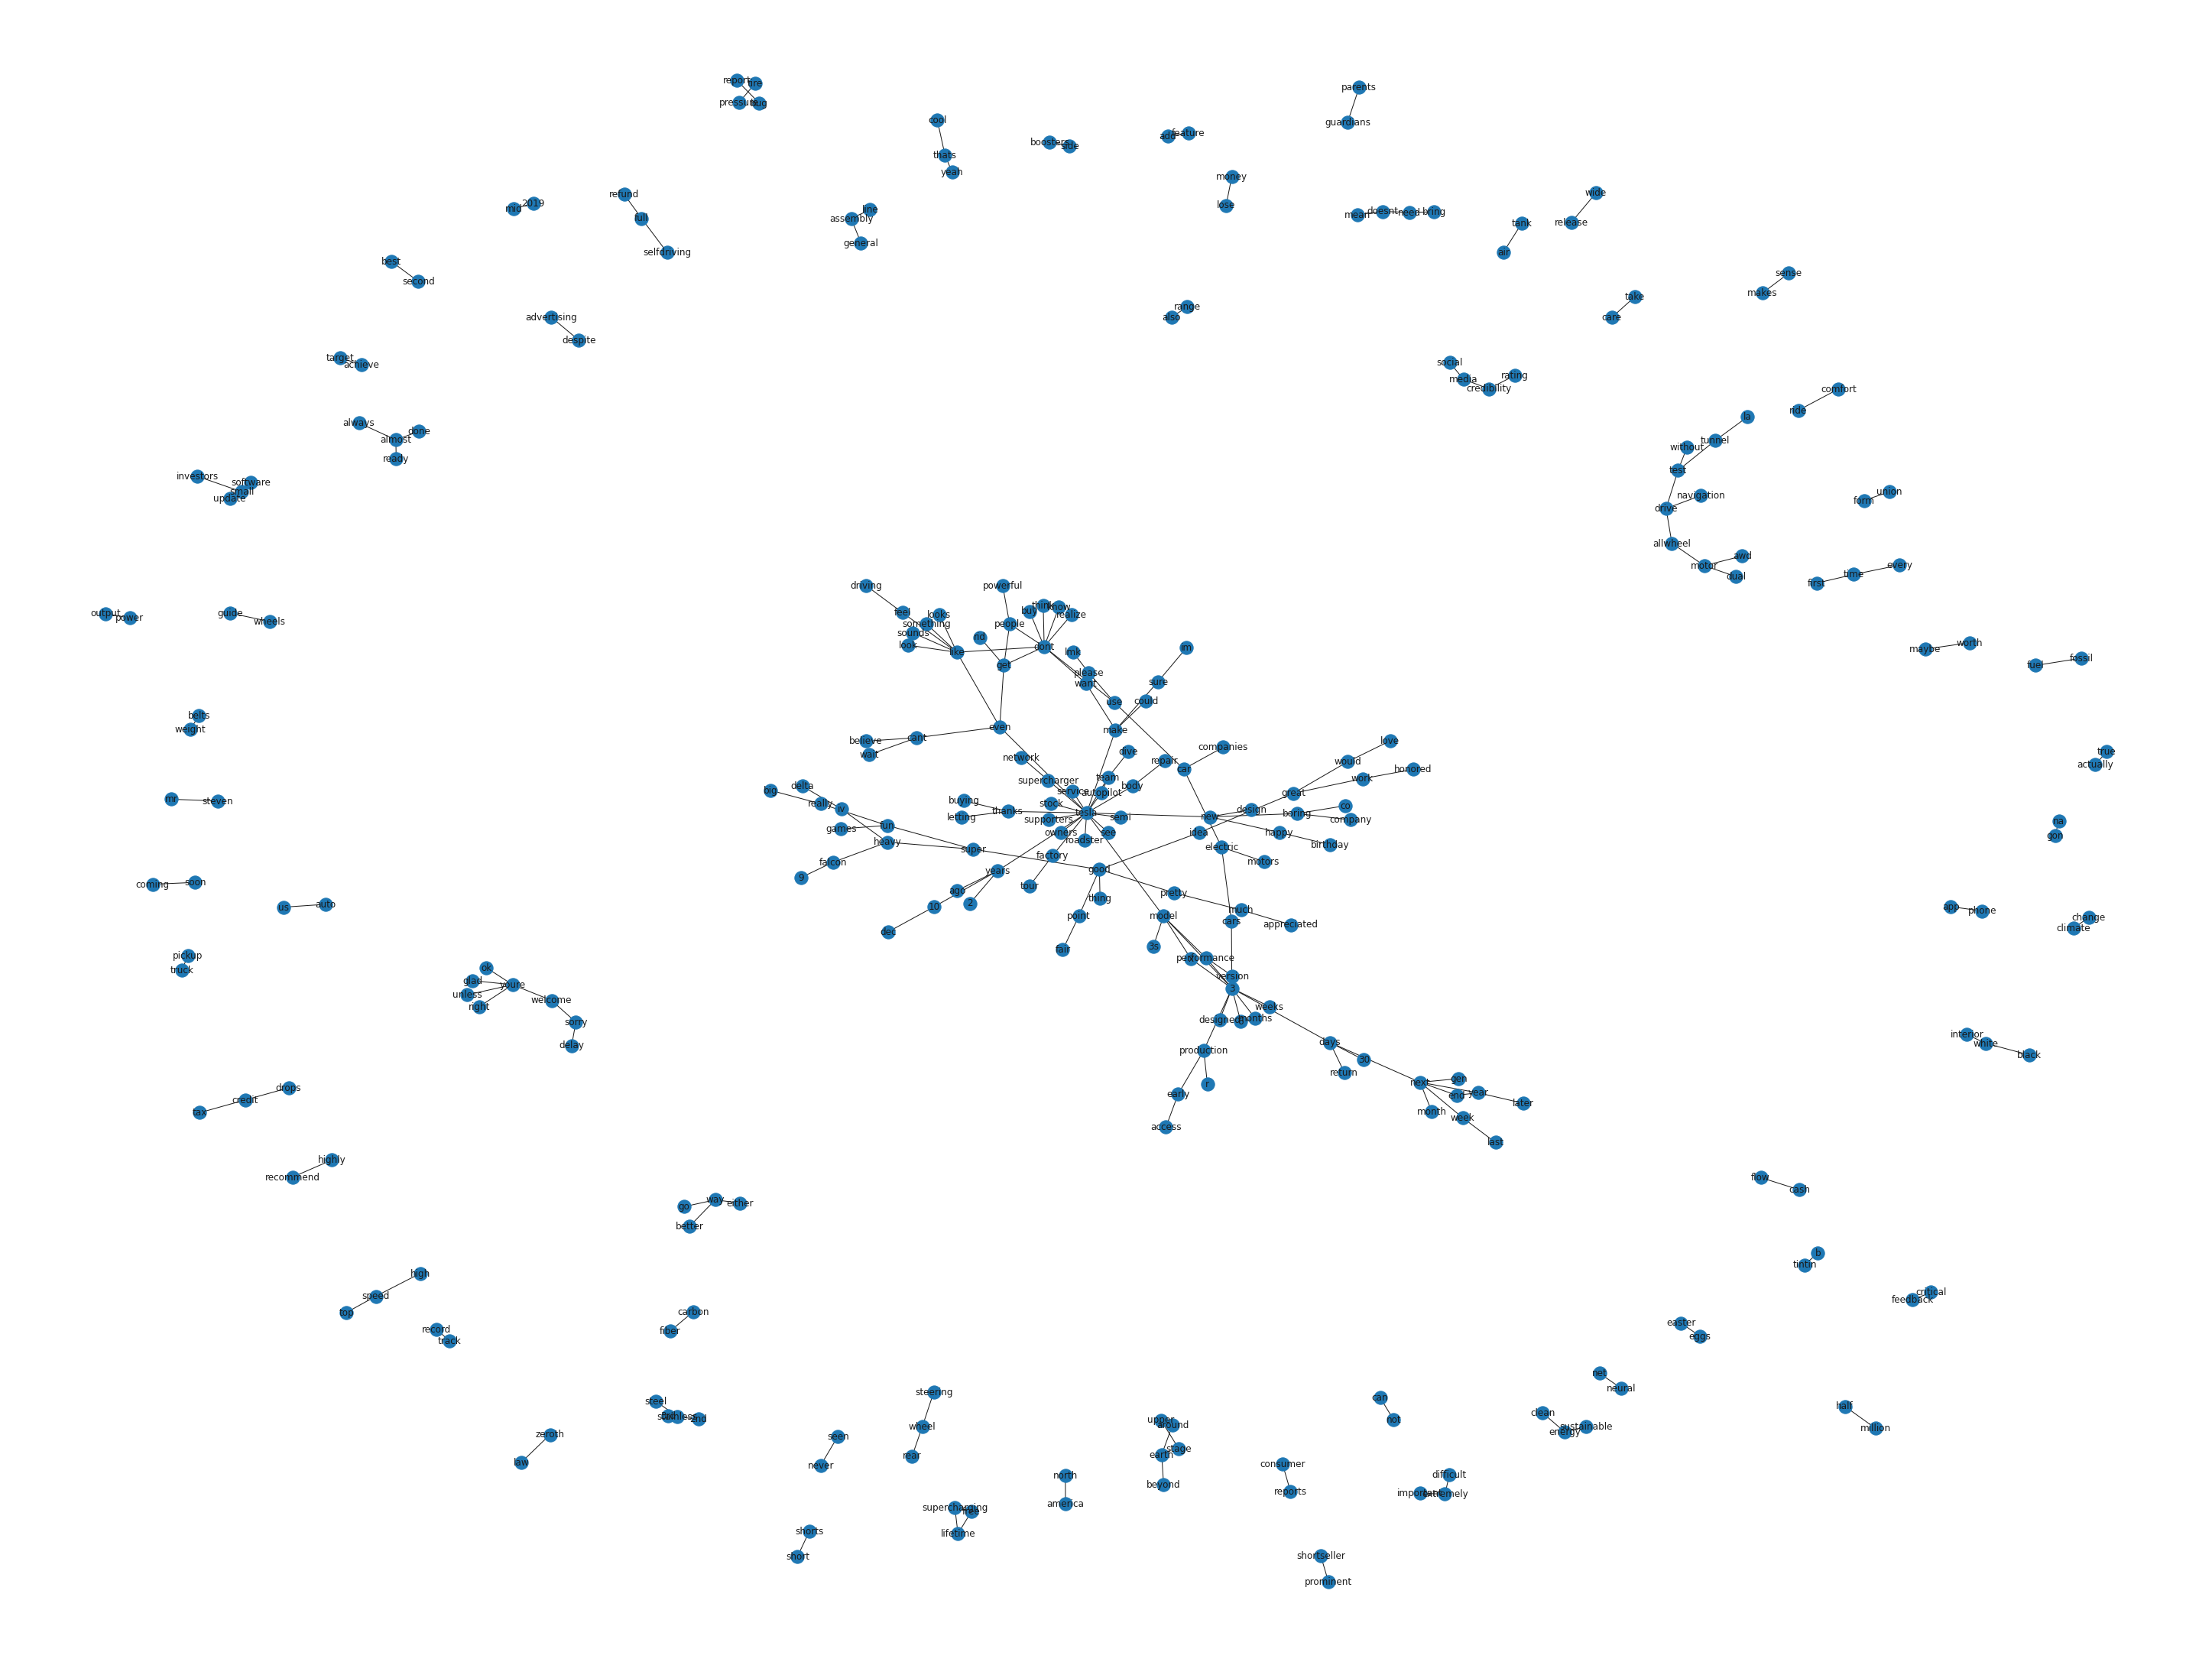

In [228]:
networkgraph(3,2018) # network graph for year 2018

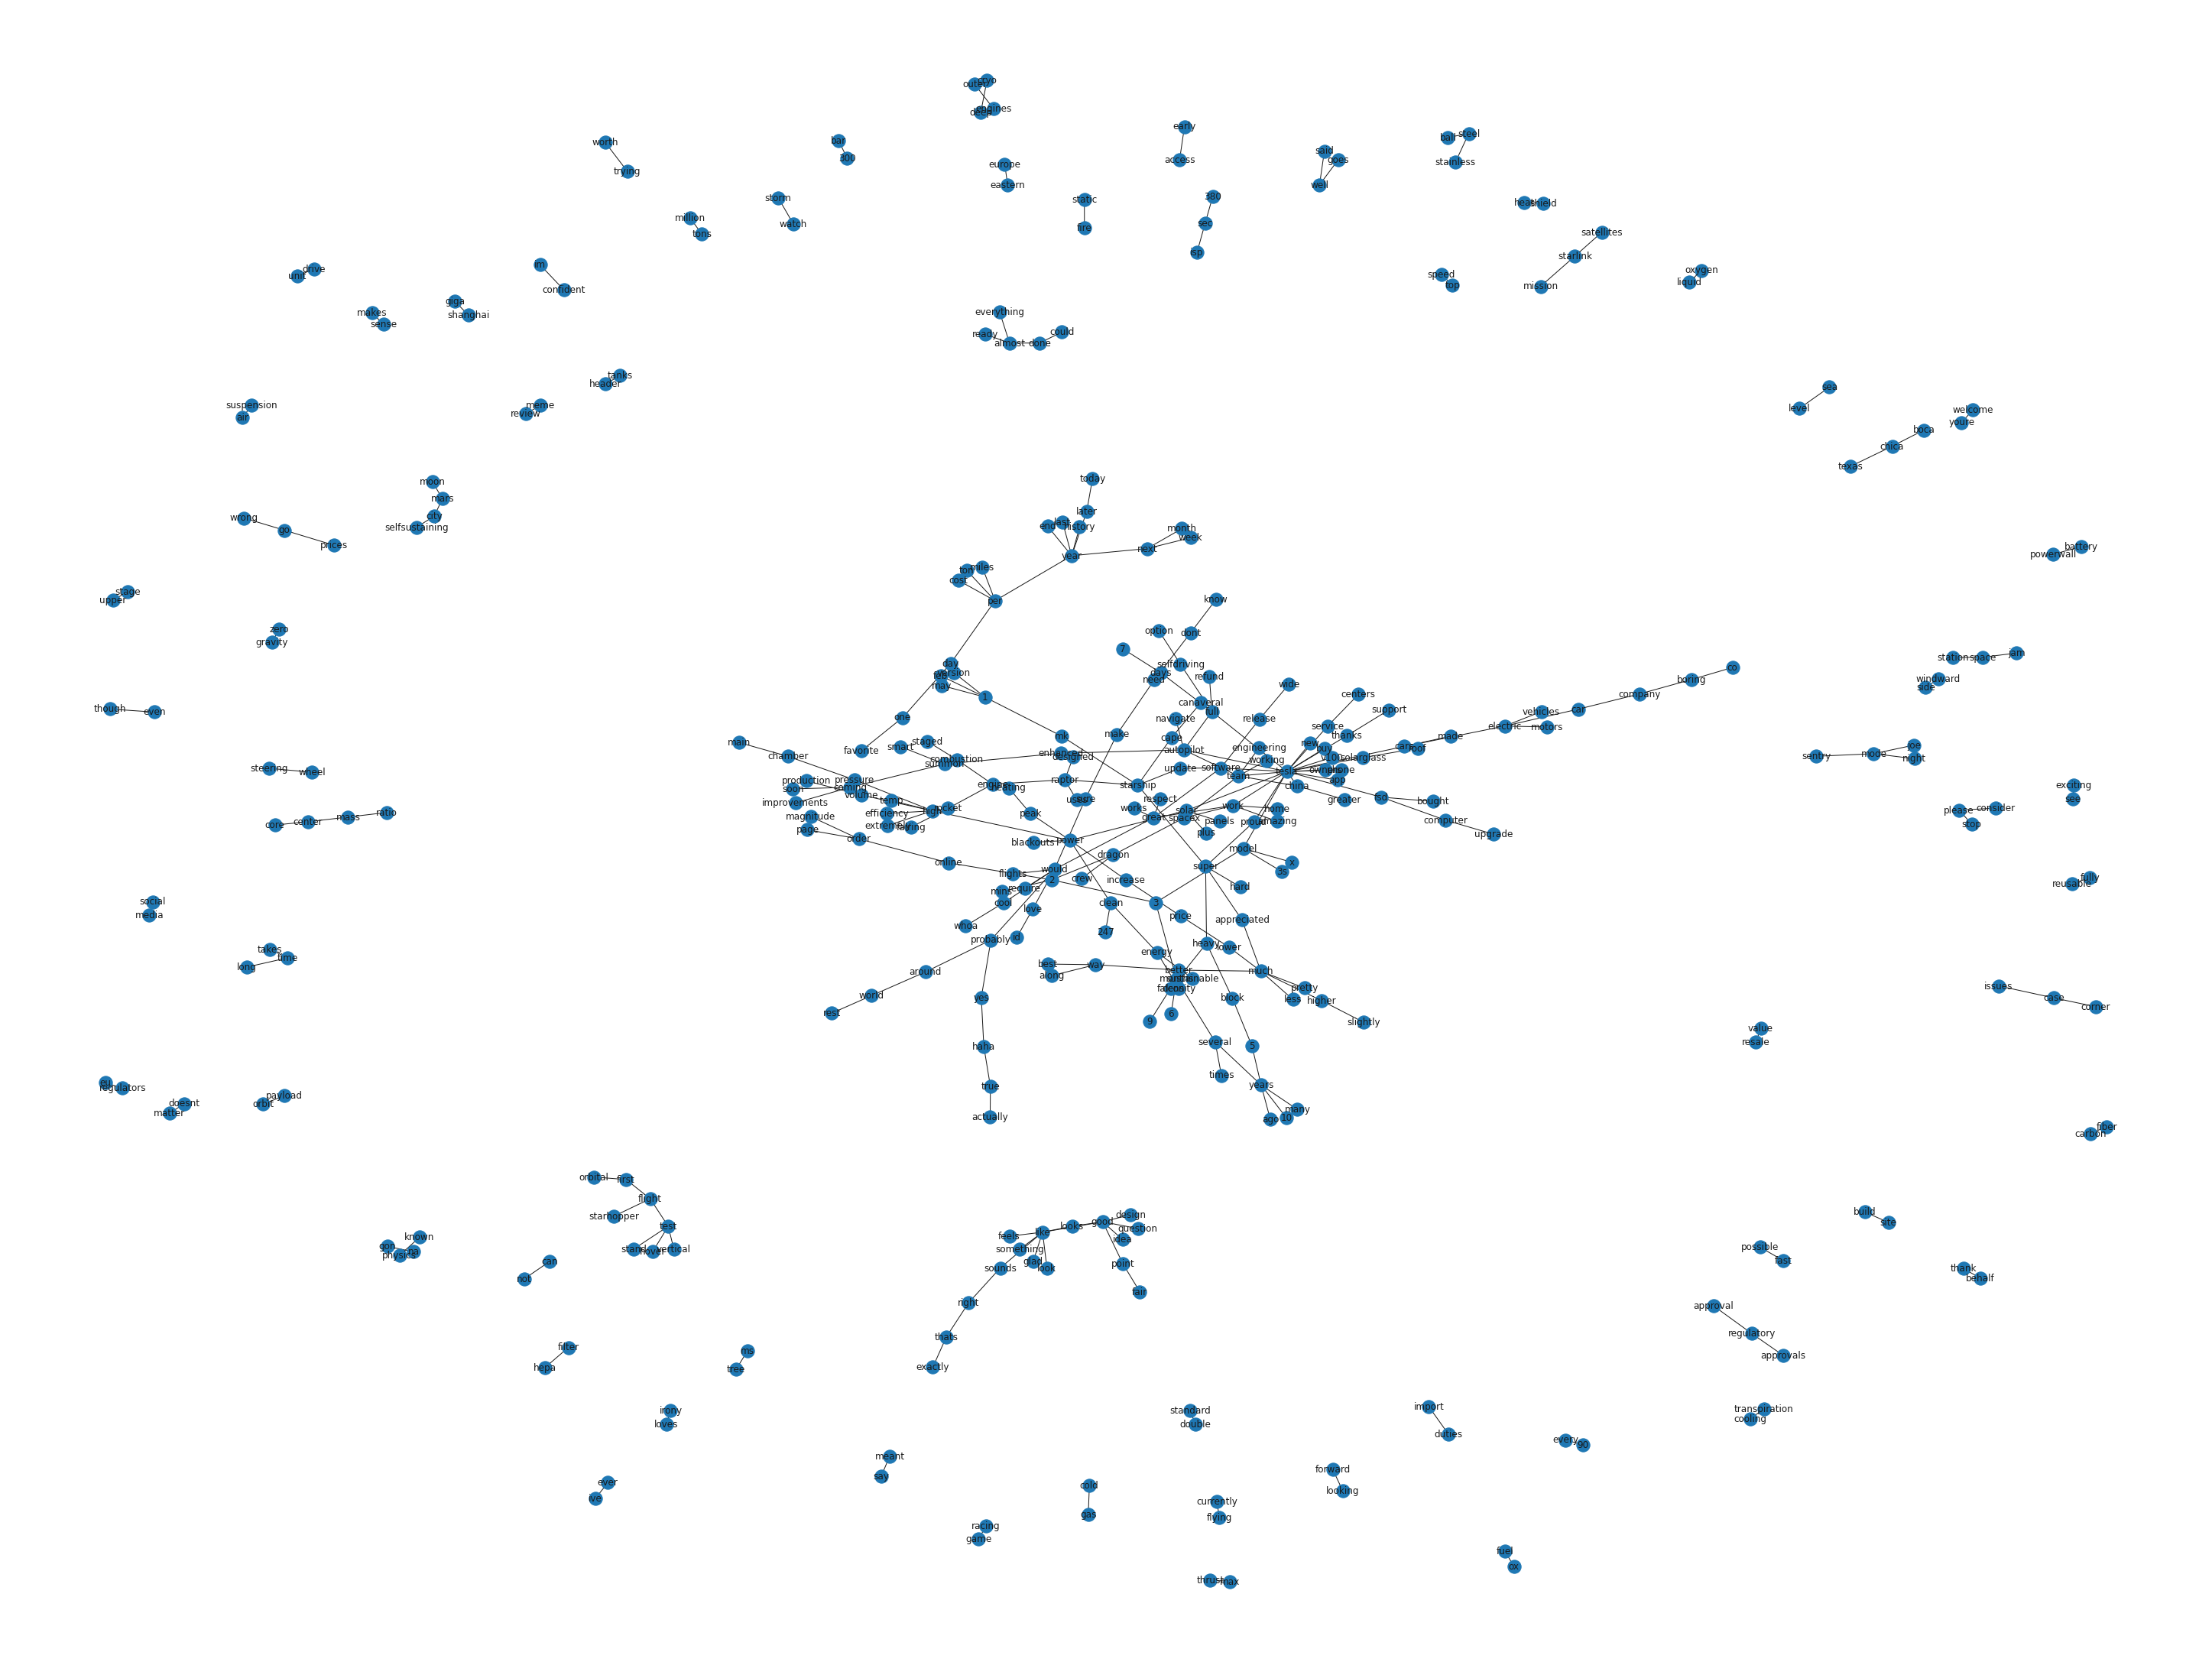

In [229]:
networkgraph(3,2019) # network graph for year 2019

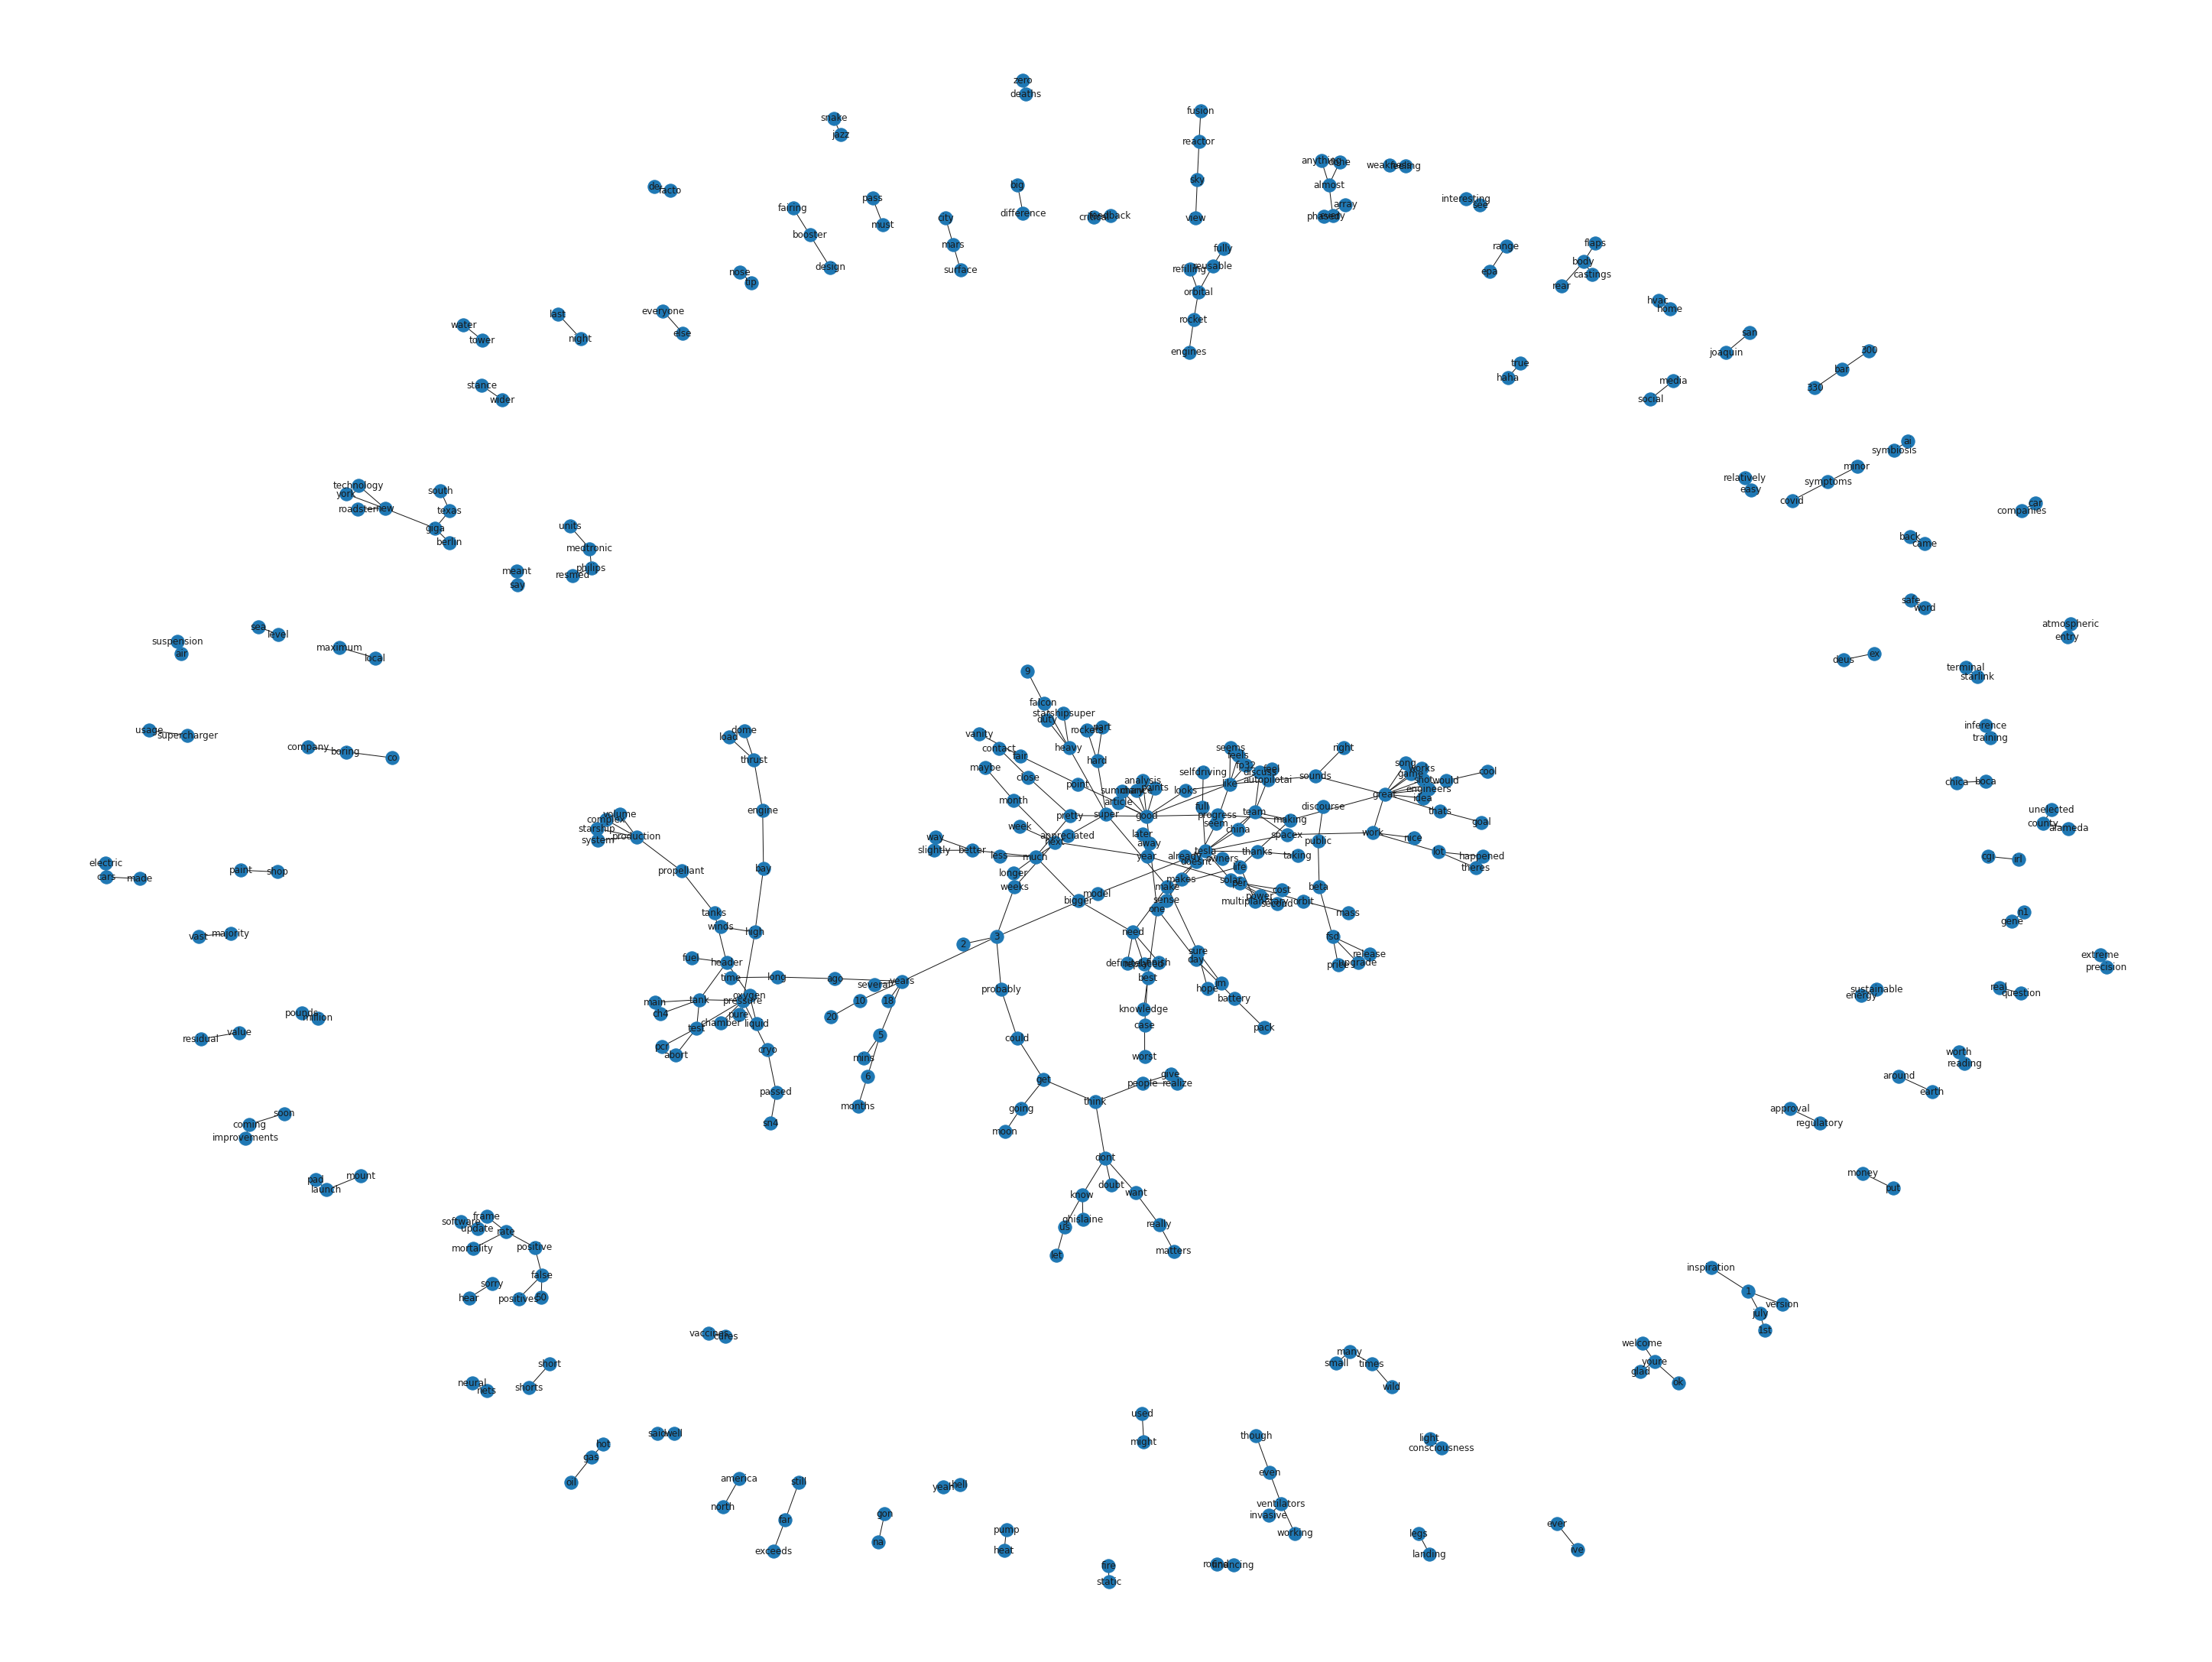

In [230]:
networkgraph(3,2020) # network graph for year 2020

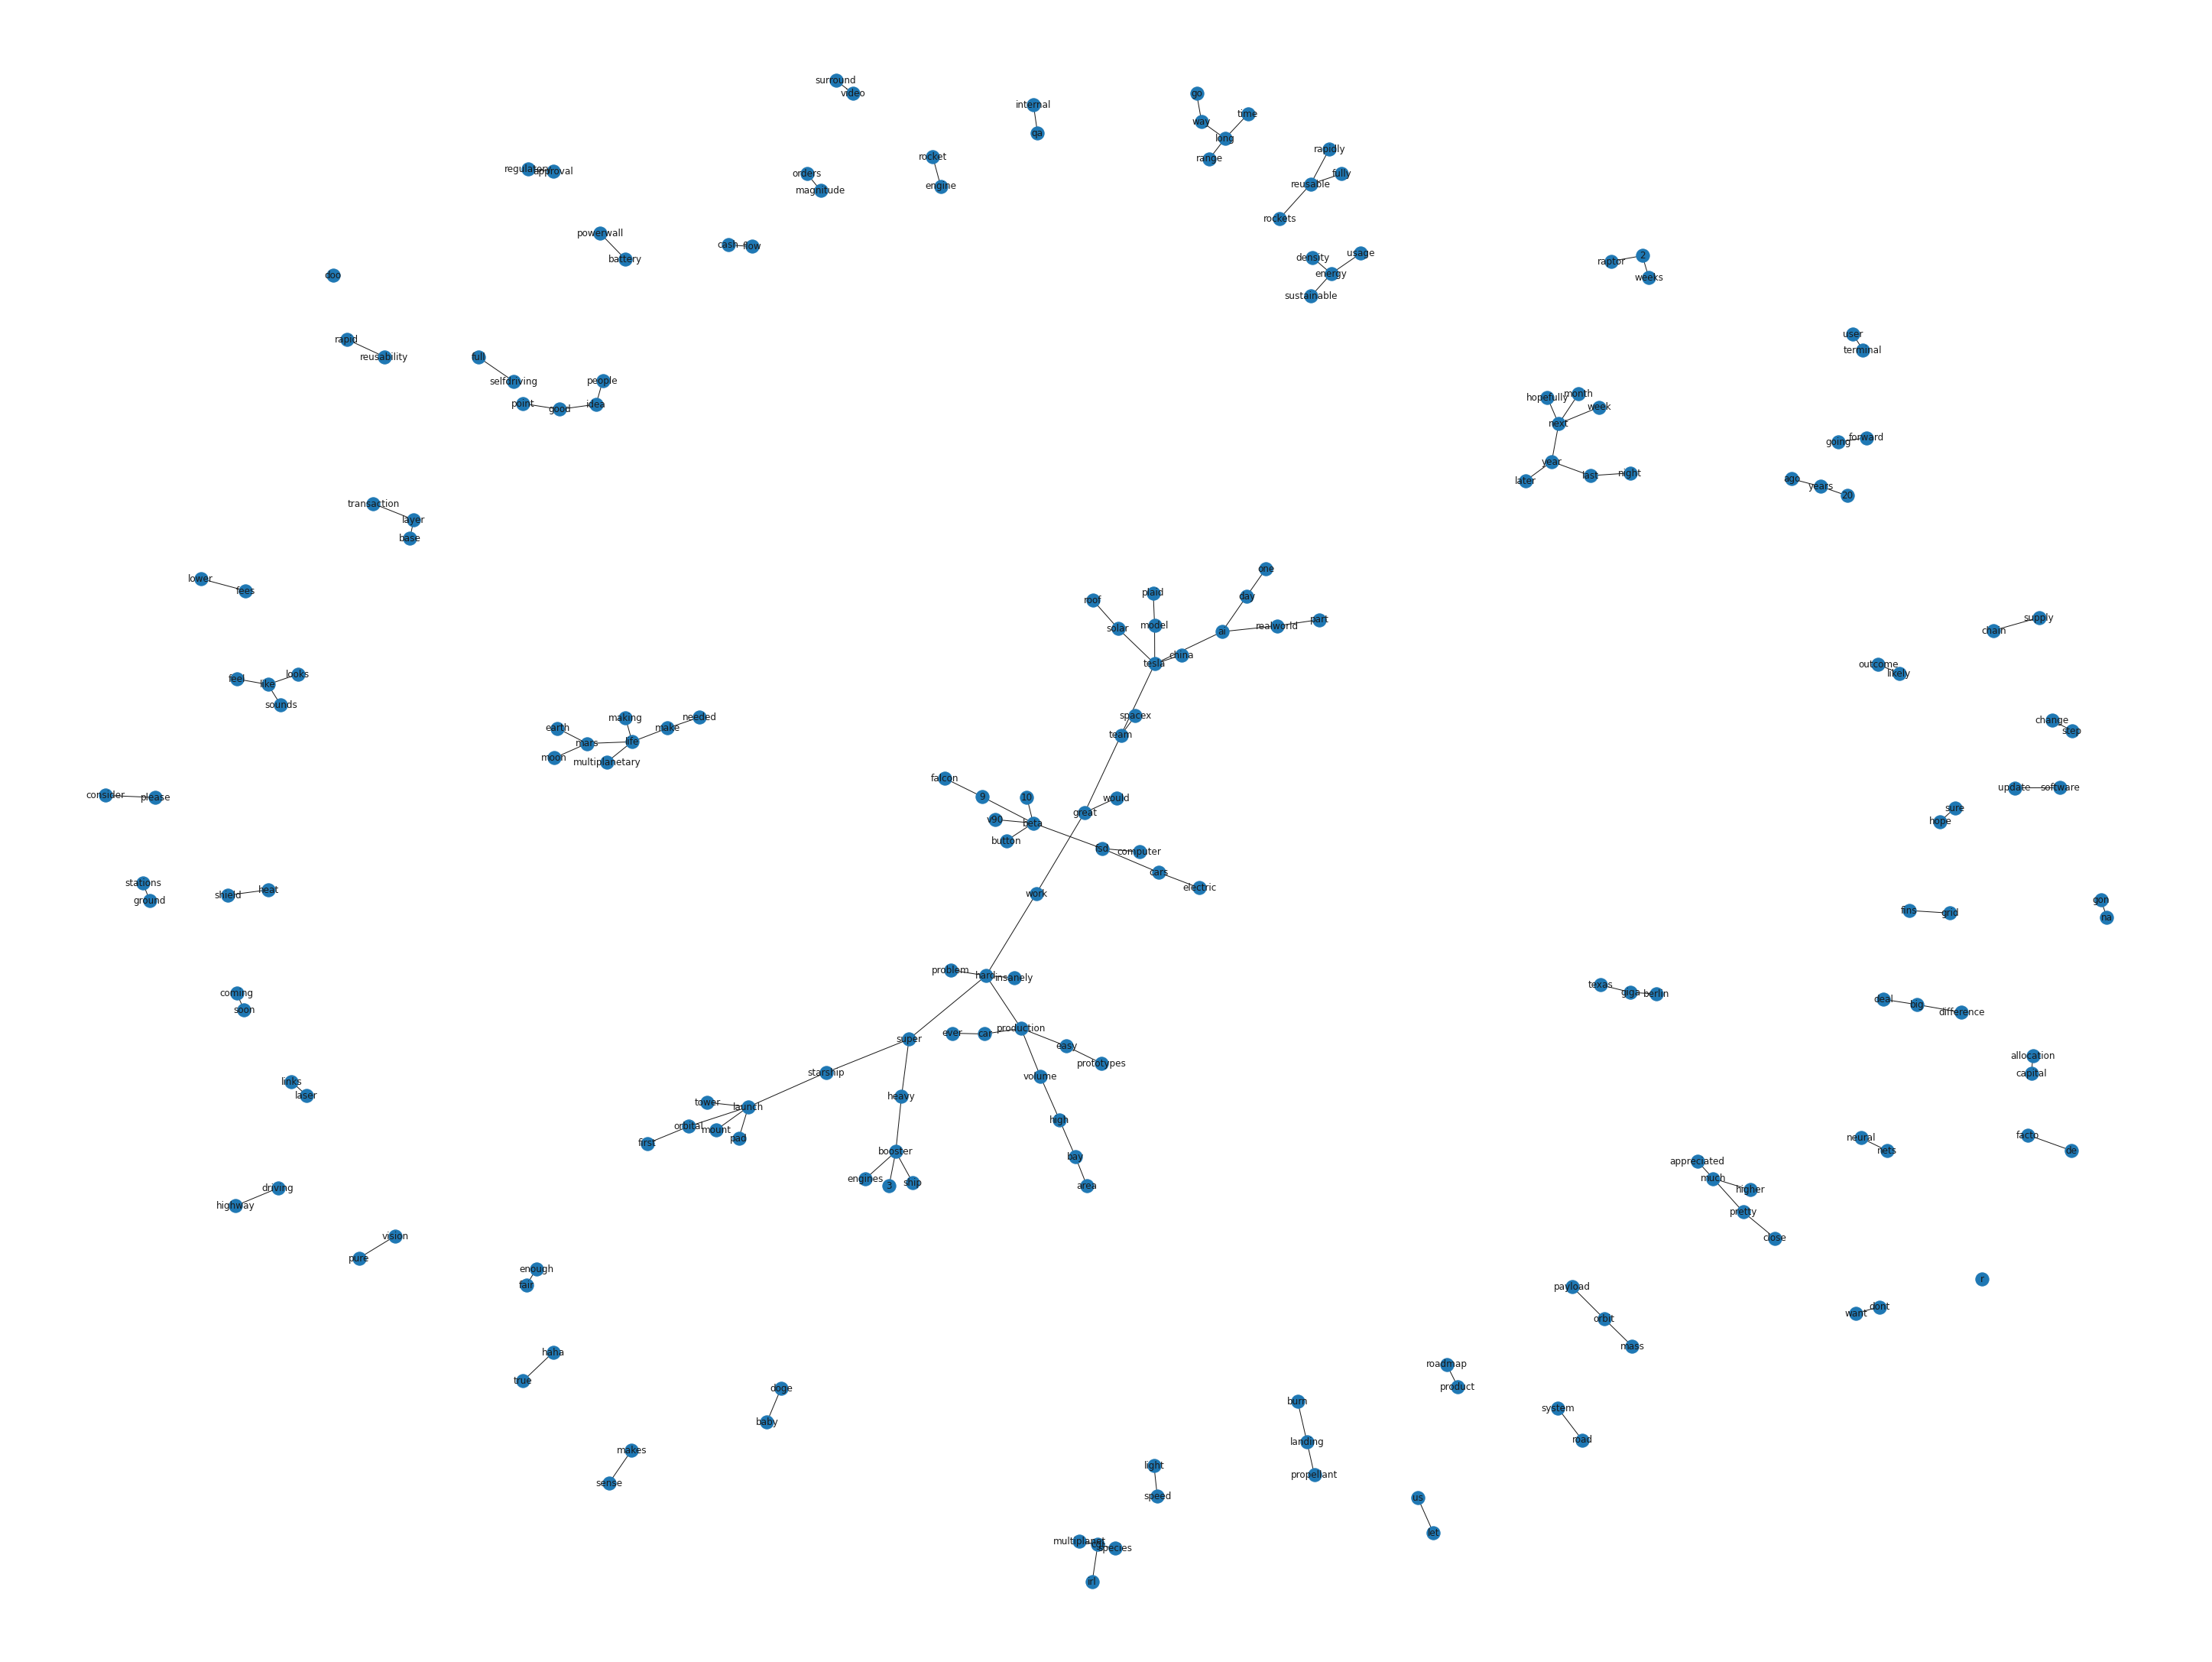

In [231]:
networkgraph(4,2021) # network graph for year 2021

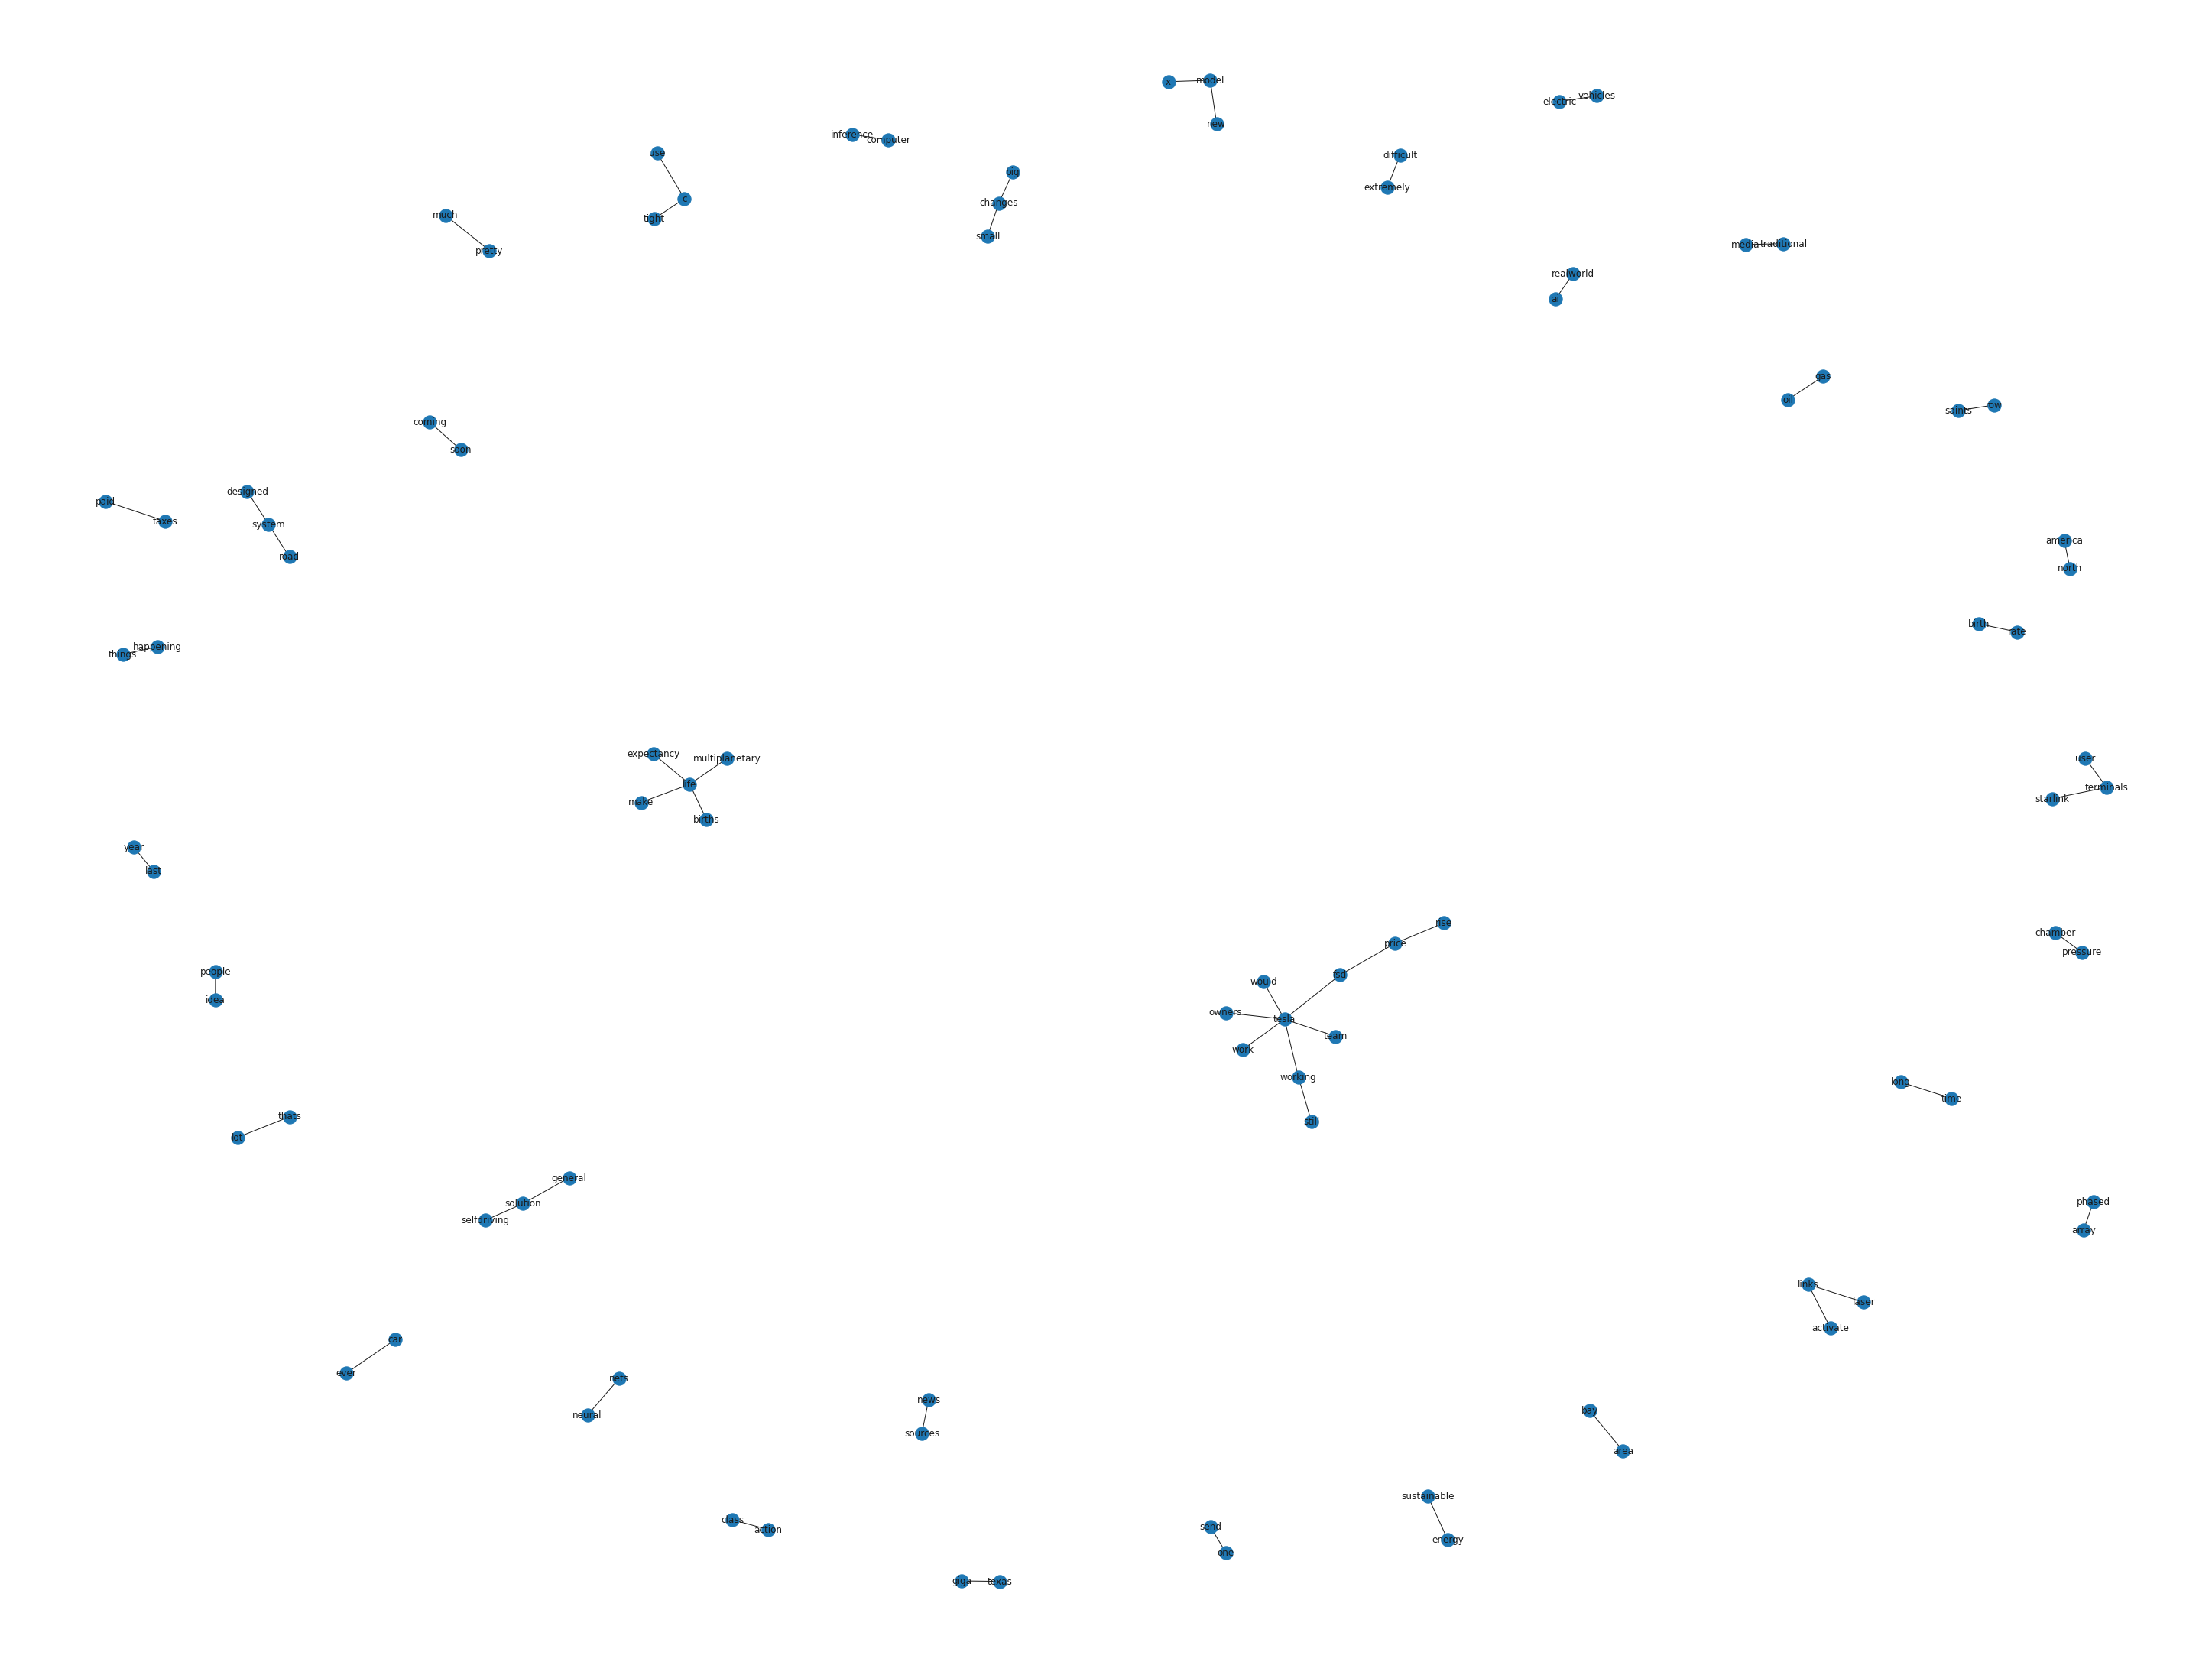

In [232]:
networkgraph(3,2022) # network graph for year 2022